In [1]:
import pandas as pd

# 数据加载

In [3]:
data = pd.read_csv('./Mall_data.csv')
data.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# 数据可视化分析

## 数据分布

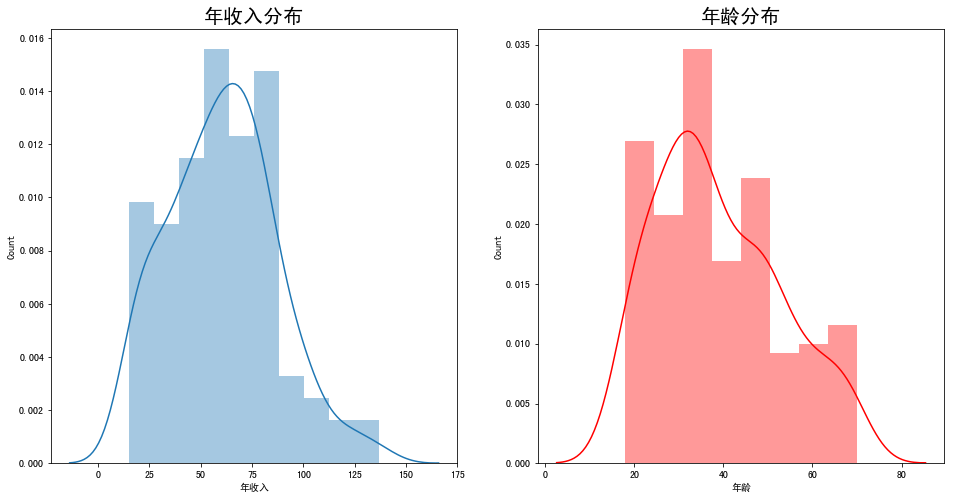

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.rcParams['figure.figsize'] = (16, 8)

plt.subplot(1, 2, 1)
sns.distplot(data['Annual Income (k$)'])
plt.title('年收入分布',fontsize=20)
plt.xlabel('年收入')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.distplot(data['Age'], color = 'red')
plt.title('年龄分布',fontsize=20)
plt.xlabel('年龄')
plt.ylabel('Count')
plt.show()

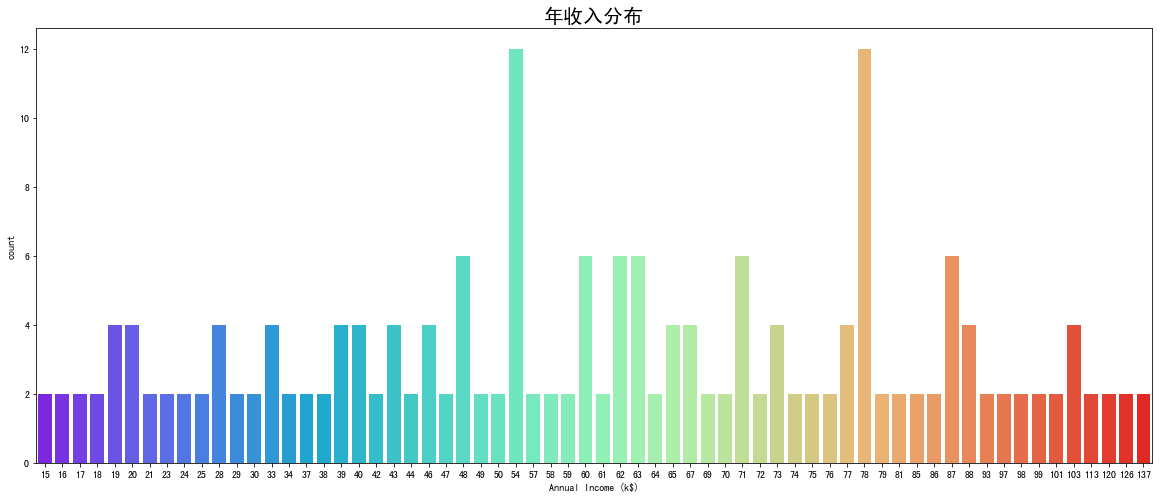

In [15]:
plt.figure(figsize=(20,8))
sns.countplot(data['Annual Income (k$)'], palette = 'rainbow')
plt.title('年收入分布', fontsize = 20)
plt.show()

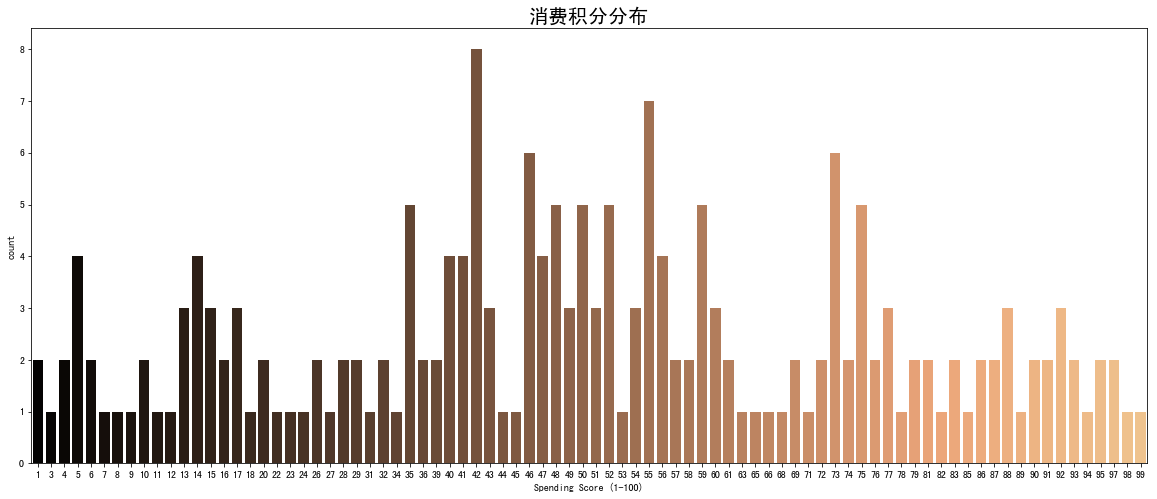

In [16]:
plt.rcParams['figure.figsize'] = (20, 8)
sns.countplot(data['Spending Score (1-100)'], palette = 'copper')
plt.title('消费积分分布', fontsize = 20)
plt.show()

In [13]:
from scipy import stats

u = data['Spending Score (1-100)'].mean()
std = data['Spending Score (1-100)'].std()
result = stats.kstest(data['Spending Score (1-100)'],'norm',(u,std)) # # p值大于0.05，为正态分布
print('p值为：%.4f' % result[1])

p值为：0.3288


## 年龄分析

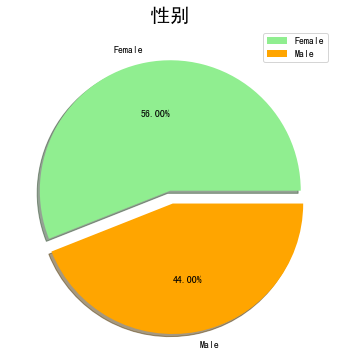

In [19]:
labels = ['Female', 'Male']
size = data['Gender'].value_counts()
colors = ['lightgreen', 'orange']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (6, 6)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('性别', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

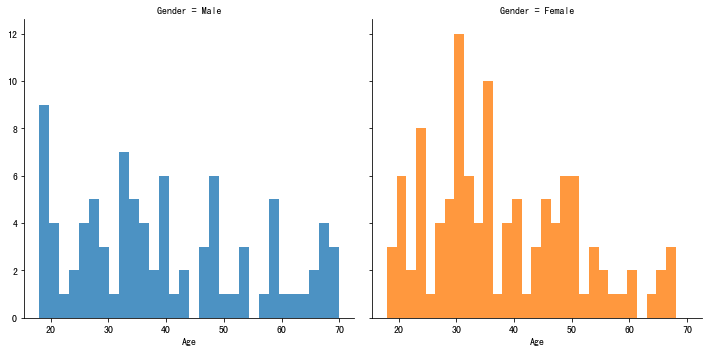

In [20]:
g = sns.FacetGrid(data, 
                  col="Gender", 
                  hue='Gender',
                  height=5,    # 图表大小
                  #aspect=1
                 ) # 图表长宽比
g.map(plt.hist, "Age",alpha=0.8,bins=30)
plt.show()

## 性别分析

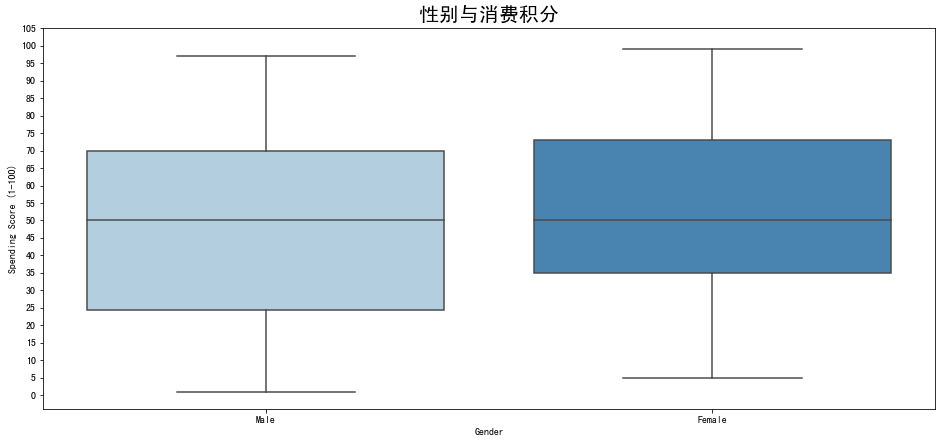

In [21]:
plt.rcParams['figure.figsize'] = (16, 7)
sns.boxplot(data['Gender'], data['Spending Score (1-100)'], palette = 'Blues')
plt.title('性别与消费积分', fontsize = 20)
plt.yticks(range(0,110,5))
plt.show()

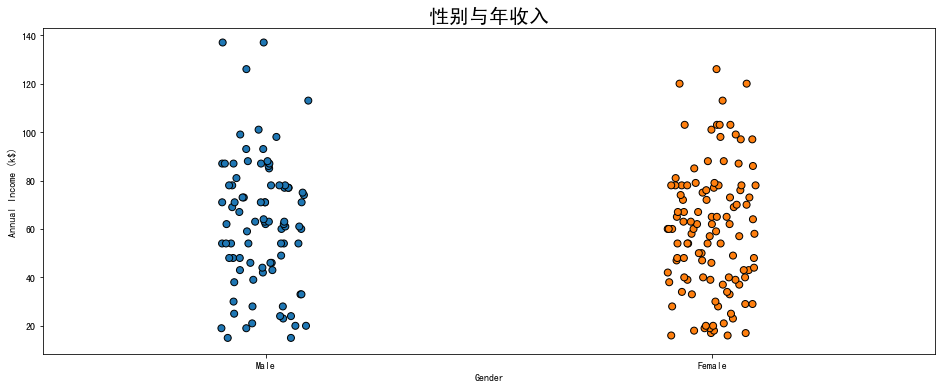

In [22]:
plt.figure(figsize=(16,6))
sns.stripplot(x='Gender', 
             y='Annual Income (k$)',
             data=data, 
             jitter=True,  # jitter → 当点数据重合较多时，用该参数做一些调整，也可以设置间距如：jitter = 0.1
             size=7,edgecolor='black',linewidth=1,marker='o') 
plt.title('性别与年收入', fontsize = 20)
plt.show()

## 相关性分析

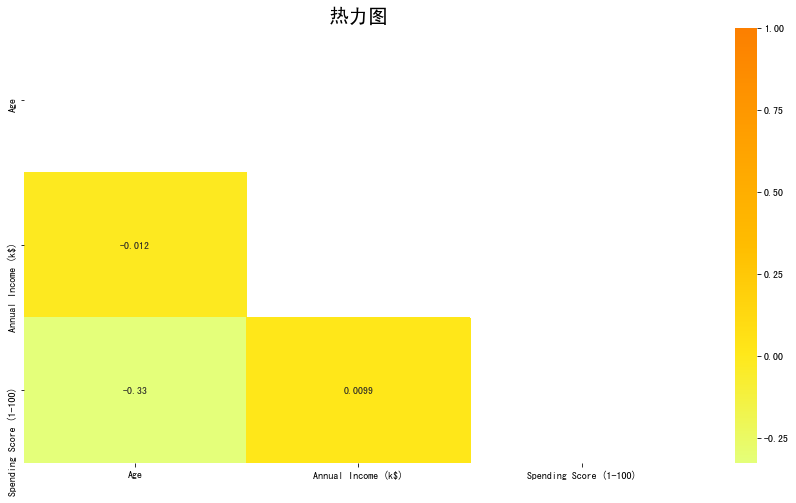

In [24]:
import numpy as np
data2 = data[['Age','Annual Income (k$)','Spending Score (1-100)']]
corr = data2.corr()   # 求解相关性系数
# 设置一个“上三角形”蒙版
mask = np.zeros_like(corr, dtype=np.bool) # 返回与给定数组的形状和类型相同的零值数组
mask[np.triu_indices_from(mask)] = True #把给定数组数据根据对角线改为1，上三角形

plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(corr, mask=mask, cmap = 'Wistia', annot = True)
plt.title('热力图', fontsize = 20)
plt.show()

# 聚类分析

In [25]:
from sklearn.cluster import KMeans

# 通过迭代确定k值
X1 = data[['Age', 'Spending Score (1-100)', 'Annual Income (k$)']].values # 转为数组形式
inertia = []

for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

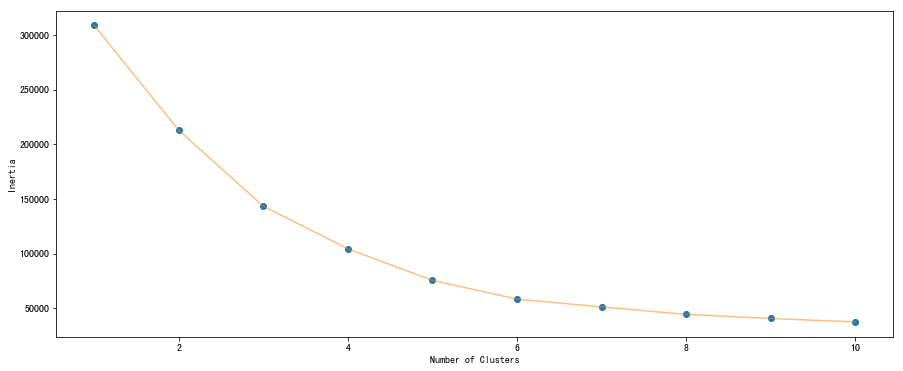

In [26]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [28]:
x = data[['Age', 'Spending Score (1-100)', 'Annual Income (k$)']].values

kmeans = KMeans(n_clusters=6) # 根据上方选择，确认k值为6
kmeans.fit(x)
y_kmeans = kmeans.predict(x)
centroids = kmeans.cluster_centers_

In [29]:
data3 = data[['Age', 'Spending Score (1-100)', 'Annual Income (k$)']]
data3['kmeans'] = y_kmeans
data3.head()

D:\Anaconda\install\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Age,Spending Score (1-100),Annual Income (k$),kmeans
0,19,39,15,3
1,21,81,15,5
2,20,6,16,3
3,23,77,16,5
4,31,40,17,3


In [31]:
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)

trace1 = go.Scatter3d(
    x= data3['Age'],
    y= data3['Spending Score (1-100)'],
    z= data3['Annual Income (k$)'],
    text= data3['kmeans'],
    mode='markers',
     marker=dict(
        color = data3['kmeans'], 
        colorscale='Viridis',
        size= 10,
        line=dict(
            color= data3['kmeans'],
            width= 12
        ),
        opacity=0.8
     )
)
df = [trace1]

layout = go.Layout(
    title = 'Character vs Gender vs Alive or not',
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0  
    ),
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending Score'),
            zaxis = dict(title  = 'Annual Income')
        ),
    template='plotly_white', 
)

fig = go.Figure(data = df, layout = layout)
py.iplot(fig)